### Problem Statement
## Predict whether a person earns more than $50K per year based on demographic data using classification algorithms.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
(df == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
df['workclass'] = df['workclass'].replace('?', df['workclass'].mode()[0])
df['occupation'] = df['occupation'].replace('?', df['occupation'].mode()[0])
df['native.country'] = df['native.country'].replace('?', df['native.country'].mode()[0])

In [9]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


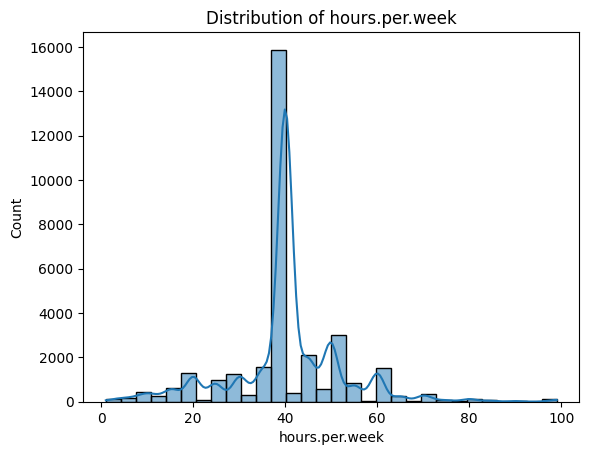

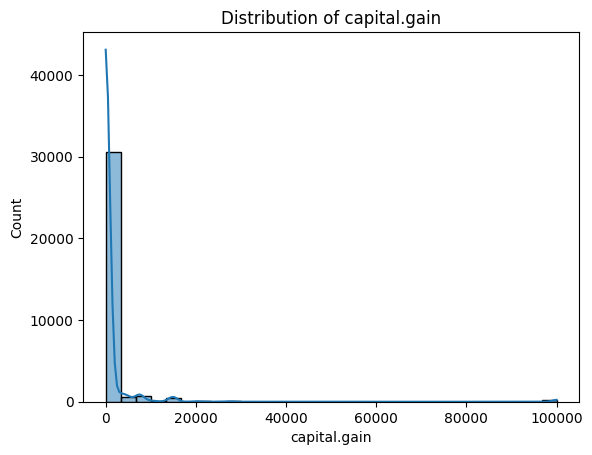

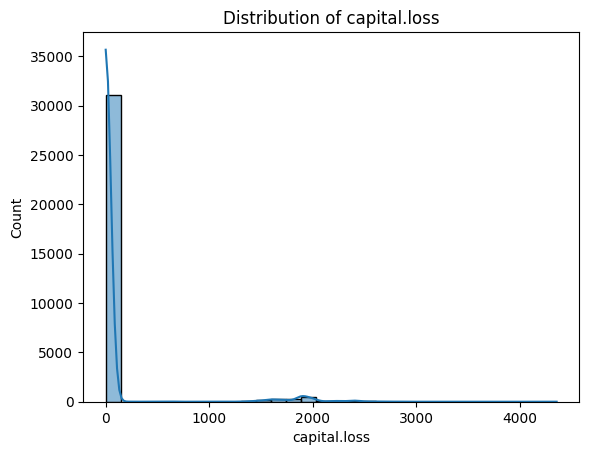

In [10]:
num_cols = ['hours.per.week', 'capital.gain', 'capital.loss']
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

In [11]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_grp'] = df['age'].apply(age_group)

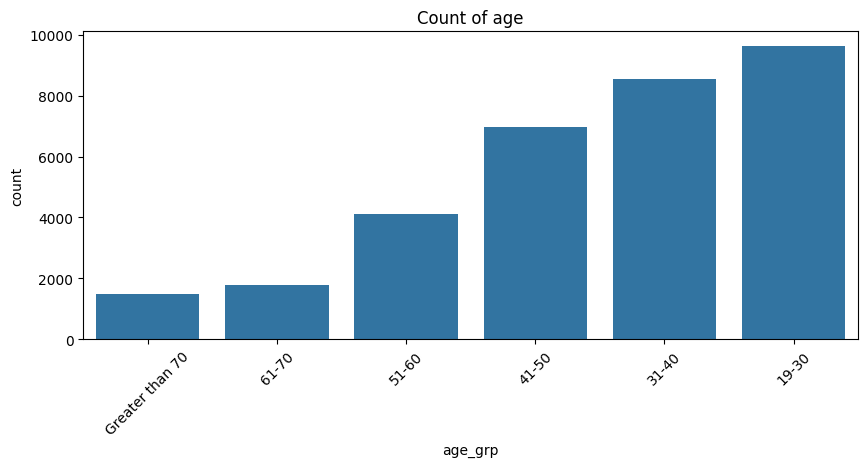

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(x='age_grp', data=df)
plt.xticks(rotation=45)
plt.title("Count of age")
plt.show()

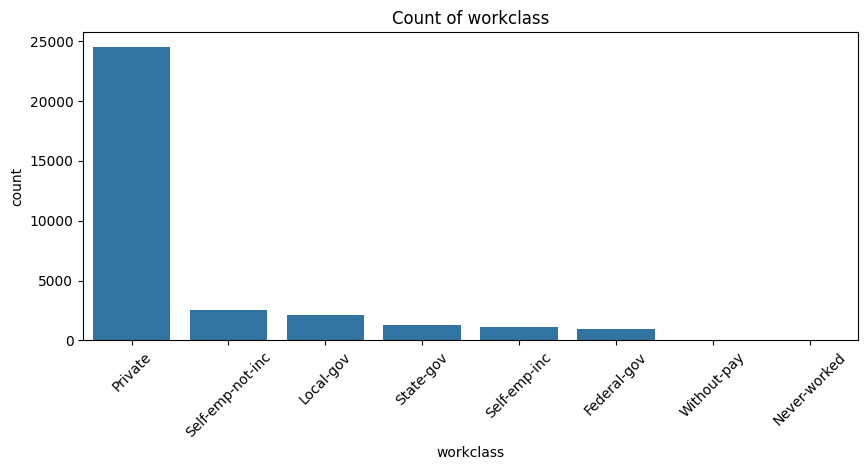

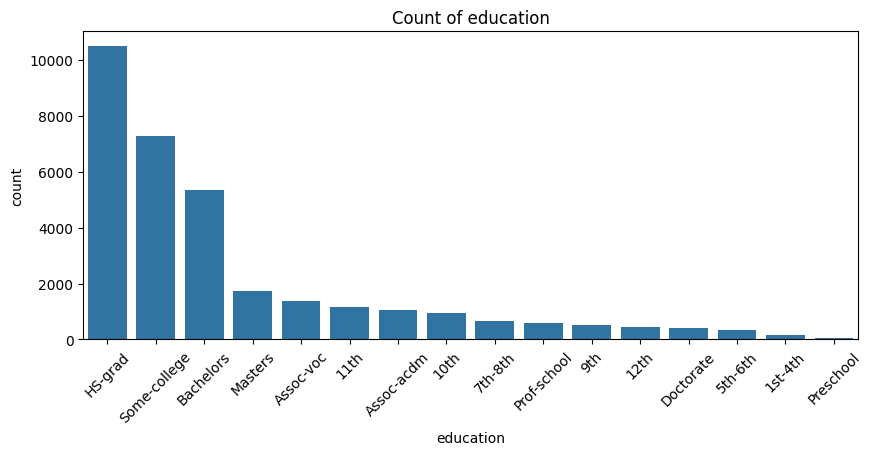

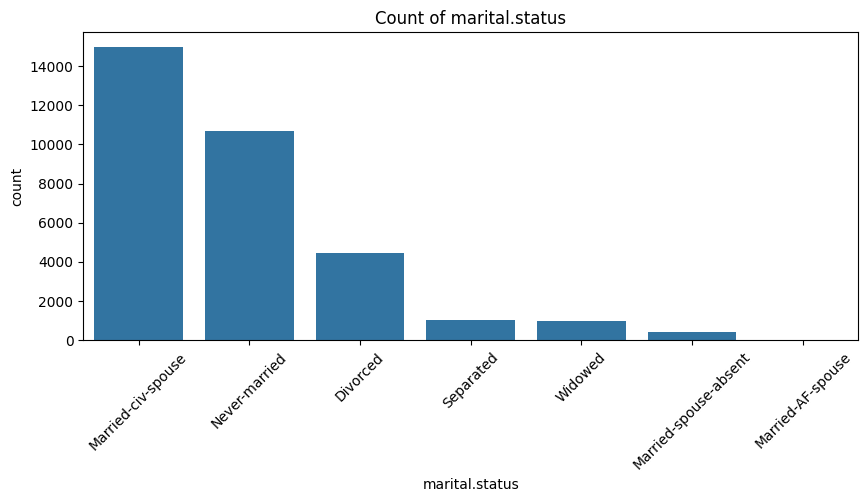

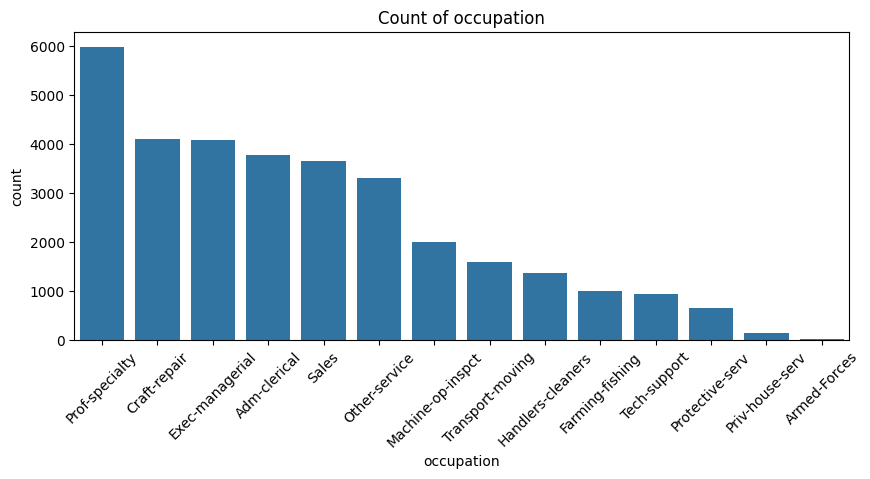

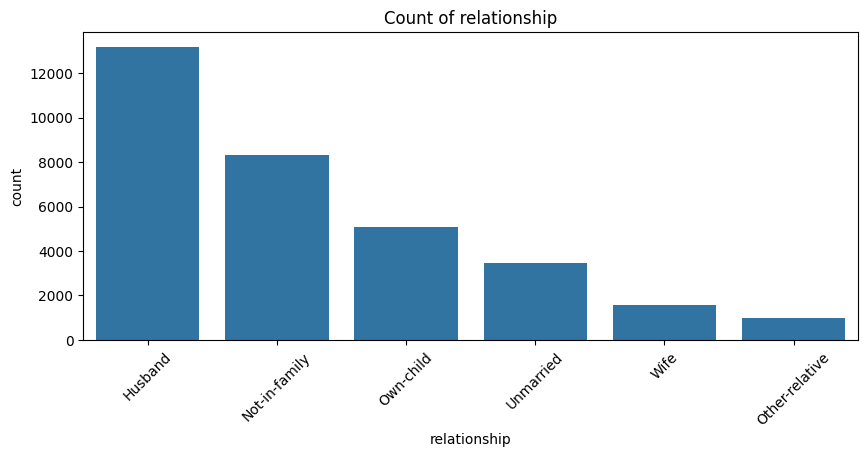

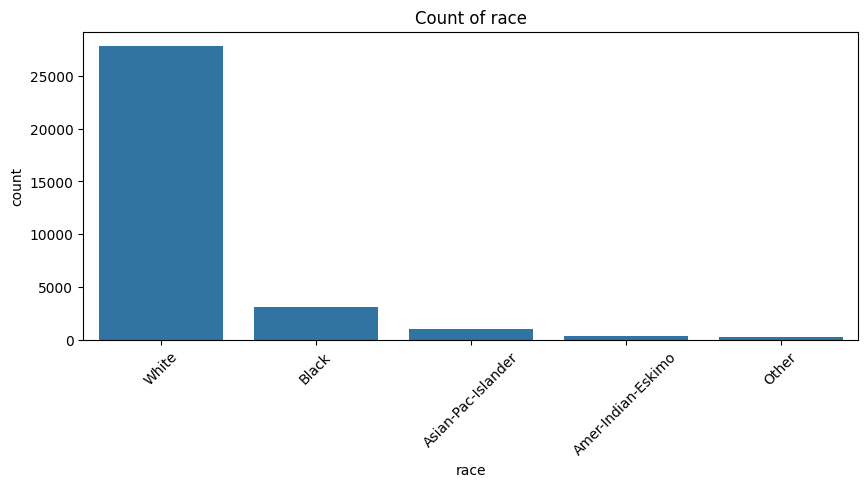

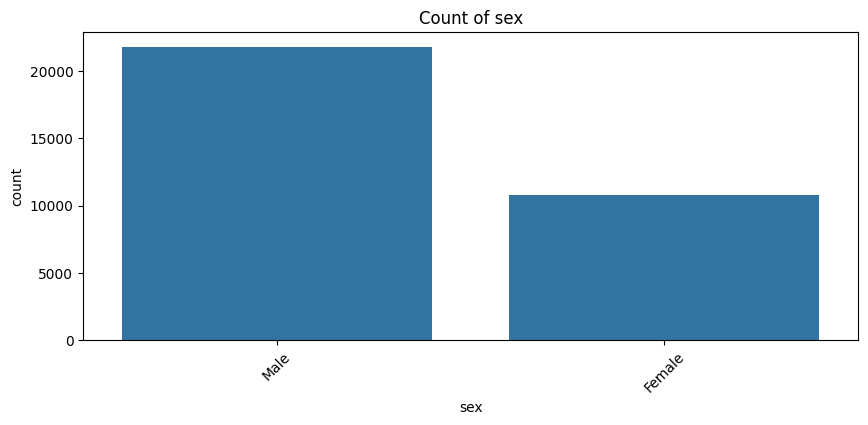

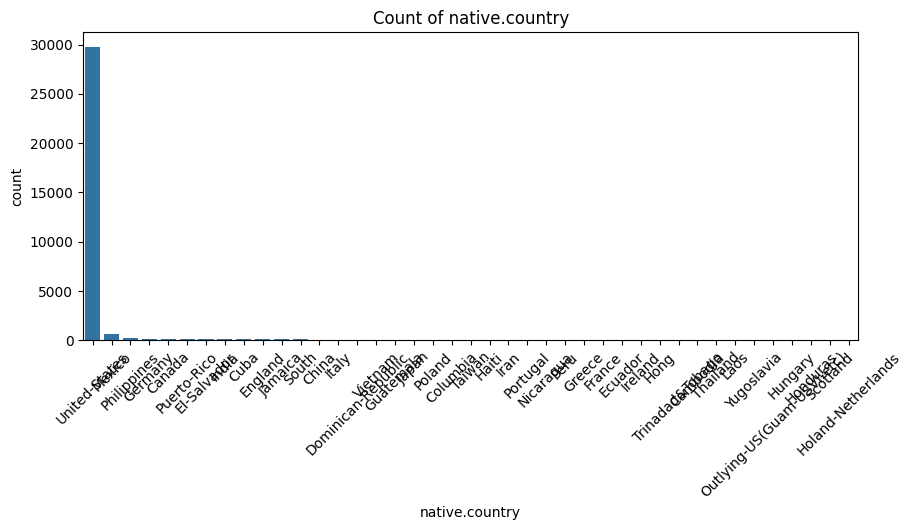

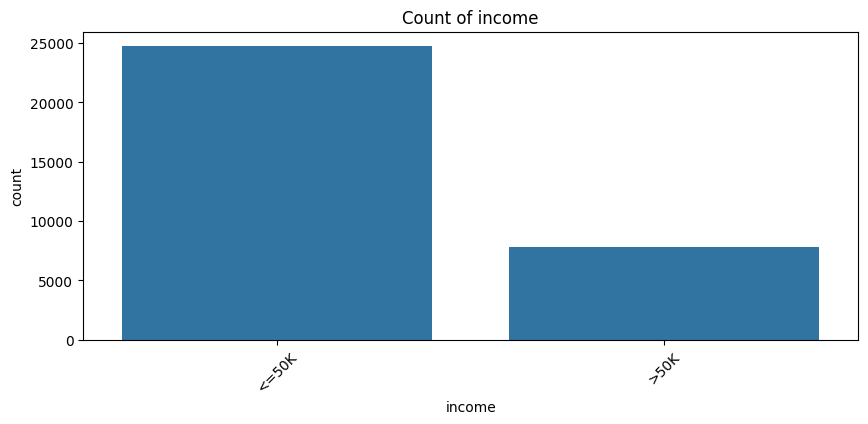

In [13]:
cat_cols = ['workclass', 'education', 'marital.status', 'occupation', 
            'relationship', 'race', 'sex', 'native.country', 'income']

for col in cat_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Count of {col}")
    plt.show()


In [14]:
df.drop('marital.status', axis=1, inplace=True)
df.drop(['education.num'], axis = 1, inplace = True)

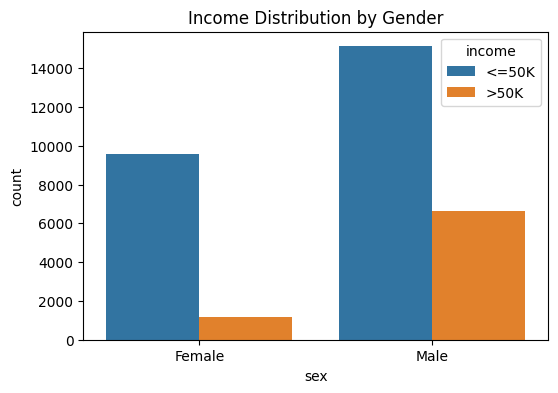

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='income', data=df)
plt.title("Income Distribution by Gender")
plt.show()

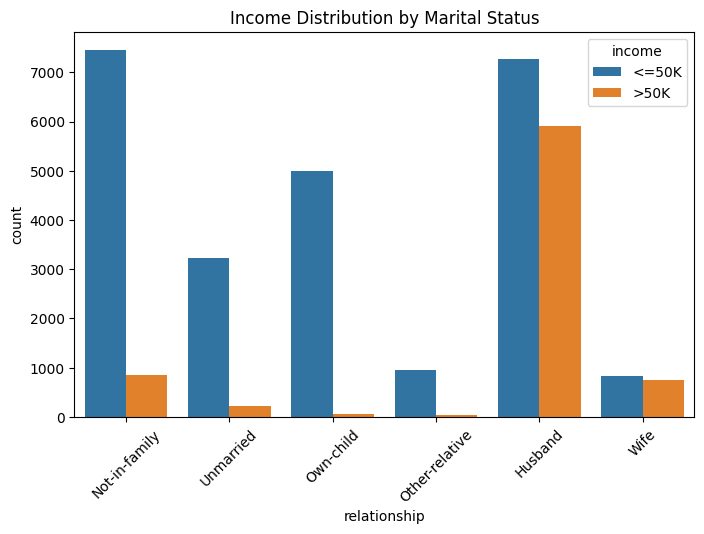

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='relationship', hue='income', data=df)
plt.xticks(rotation=45)
plt.title("Income Distribution by Marital Status")
plt.show()

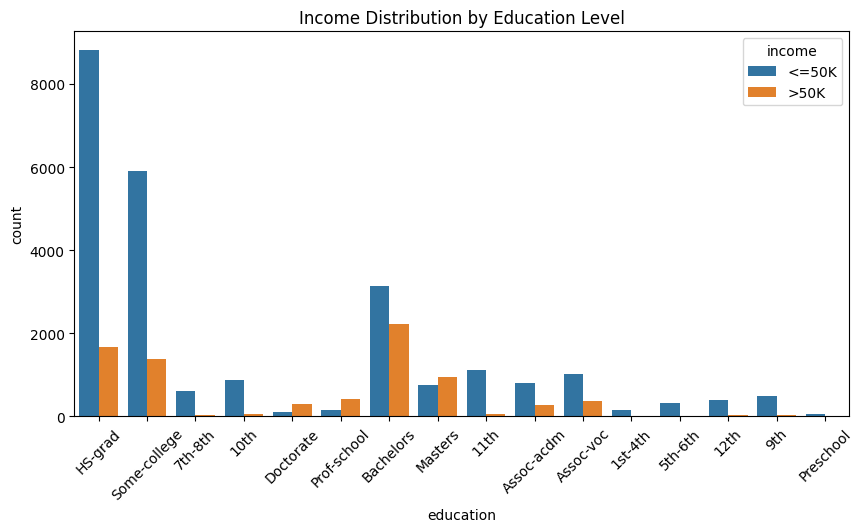

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(x='education', hue='income', data=df)
plt.xticks(rotation=45)
plt.title("Income Distribution by Education Level")
plt.show()

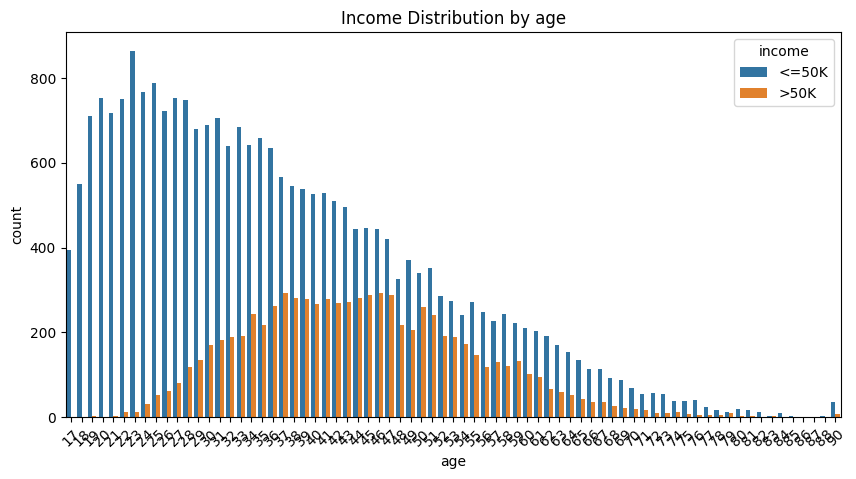

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x='age', hue='income', data=df)
plt.xticks(rotation=45)
plt.title("Income Distribution by age")
plt.show()

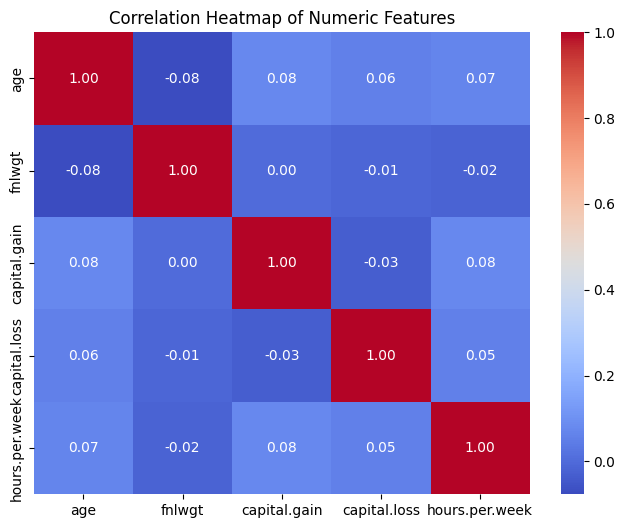

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [20]:
df.drop('age_grp', inplace = True, axis = 1)

In [21]:
df['education'] = df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], 'School')

df['race'] = df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other')

In [22]:
category = ['workclass','education', 'occupation', 'relationship', 'race', 'sex','native.country']
label_encoder = LabelEncoder()
for c in category:
    label_encoder.fit(df[c])
    df[c] = label_encoder.transform(df[c])

In [23]:
df.head()

,age,workclass,fnlwgt,education,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053,4,9,1,1,0,0,4356,40,38,<=50K
1,82,3,132870,4,3,1,1,0,0,4356,18,38,<=50K
2,66,3,186061,8,9,4,0,0,0,4356,40,38,<=50K
3,54,3,140359,7,6,4,1,0,0,3900,40,38,<=50K
4,41,3,264663,8,9,3,1,0,0,3900,40,38,<=50K


In [24]:
x = df[['workclass','education', 'occupation', 'relationship', 'race', 'sex','native.country', 'age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']]
y = df['income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [25]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [26]:
#libraries for model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [27]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

In [30]:
accuracy_results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8041
Decision Tree Accuracy: 0.8109
Random Forest Accuracy: 0.8561
KNN Accuracy: 0.8237
SVM Accuracy: 0.8288
Naive Bayes Accuracy: 0.7965
Gradient Boosting Accuracy: 0.8626


In [31]:
# A sorted table for comparison 
results_df = pd.DataFrame(list(accuracy_results.items()), columns=['Model', 'Accuracy'])
print("\n\nModel Performance Summary:")
display(results_df.sort_values(by='Accuracy', ascending=False))



Model Performance Summary:


,Model,Accuracy
6,Gradient Boosting,0.862627
2,Random Forest,0.856075
4,SVM,0.828846
3,KNN,0.823728
1,Decision Tree,0.810933
0,Logistic Regression,0.804074
5,Naive Bayes,0.796499


### Thus the gradient boosting algorithm has the greatest accuracy

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.2, 0.3]
}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=3)
grid.fit(x_train, y_train)
print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200}
Best Accuracy: 0.8711829130355125


In [40]:
best_model = GradientBoostingClassifier(
    learning_rate=0.2,
    n_estimators=200
)
best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred))

Final Accuracy: 0.8686661889650936


In [41]:
import joblib
joblib.dump(best_model, "income_model.pkl")

['income_model.pkl']

In [42]:
!pip install streamlit

  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 246.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 602.1 kB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 313.4 kB/s eta 0:00:0000:0100:01
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.3/107.3 kB 385.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.2/208.2 kB 324.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 602.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 2.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 787.3 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 610.0 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 340.3 kB/s eta 0:00:

In [ ]:
!streamlit run app.py


      👋 Welcome to Streamlit!

      If you'd like to receive helpful onboarding emails, news, offers, promotions,
      and the occasional swag, please enter your email address below. Otherwise,
      leave this field blank.

      Email:  